Proyecto 2. Introducción al análisis de datos
Elsa Ximena Barba Flores

In [1]:
# Comenzamos importando la librería Pandas para análisis de datos y Seaborn para graficar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Como una buena práctica se define una variable con el nombre del archivo CSV
synergy_db = "synergy_logistics_database.csv"

In [3]:
# Abrimos el archivo CSV en modo lectura
sldf = pd.read_csv(synergy_db, parse_dates=[5])


Opción 1: Rutas de importación y exportación.

Synergy Logistics quiere saber cuáles son las diez rutas más demandadas. Para resolver esto primero hay que tener en cuénta ¿Qué es lo que consideramos como ruta? Para definir una ruta es necesario tomar en cuenta el origen y el destino (no es lo mismo una ruta de China a Japón que de Japón a China) y el medio de transporte (no es lo mismo ir de México a Estados Unidos por tierra que por mar). Se consideran por separado los productos que son de importación de los de exportación.

In [4]:
# Utilizamos el método "groupby" para delimitar qué columnas de la variable dataframe queremos reacomodar
# El argumento "by" nos permite delimitar cuáles columnas queremos obtener como índices.
rutas = sldf.groupby(by=["direction", "origin", "destination", "transport_mode"])
#rutas.sum()

In [5]:
# Sumamos los valores de la columna "total_value"
suma = rutas.sum()["total_value"]
# Agregamos estadísticas descriptivas a la columna "total_value" de la variable "rutas"
rutas = rutas["total_value"].describe()
# Añadimos la columna con la suma total
rutas["suma_total"] = suma
rutas = rutas.reset_index()
#rutas

Ahora disponemos de un dataframe que contiene columnas (índices) que nos indican si se trata de una importación o una exportación, el país de origen, destino, medio de transporte, cantidad de veces que se realizó la ruta y la suma total de los valores generados por cada ruta.

Con estos datos, hacemos el análisis para las diez rutas de exportación y las diez rutas de importación más demandadas

In [6]:
# Creamos dos df separados, uno que contenga solo las importaciones y uno que contenga solamente exportaciones
exportaciones = rutas[rutas["direction"] == "Exports"]
#exportaciones
importaciones = rutas[rutas["direction"] == "Imports"]
#importaciones

In [7]:
# Obtenemos un número entero que sea la suma de todos los valores de exportación
# Y otro que contenga la suma de todos los valores de importación
valor_total_exp = exportaciones.suma_total.sum()
#valor_total_exp
valor_total_imp = importaciones.suma_total.sum()

In [9]:
# Creación de una función con argumentos dataframe y un mensaje
def resultados(df, m):
    total_valor = df.suma_total.sum()
    total_usos = df['count'].sum()
    porcentaje = (total_valor / valor_total_exp)*10000
    porcentaje = int(porcentaje) / 100
    print(f"Las 10 rutas {m} aportan {porcentaje}%, en un total de: {total_usos} servicios")

Mostrando las diez rutas de exportación más demandadas

In [10]:
mas_demandadas_exp = exportaciones.sort_values(by="count", ascending=False).head(10)
mas_demandadas_exp = mas_demandadas_exp.reset_index()
mayor_valor_exp = exportaciones.sort_values(by="suma_total", ascending=False).head(10)
mayor_valor_exp = mayor_valor_exp.reset_index()
#mas_demandadas_exp
#mayor_valor_exp

In [11]:
resultados(mas_demandadas_exp, "mas demandadas")
resultados(mayor_valor_exp, "con mayor valor")

Las 10 rutas mas demandadas aportan 28.13%, en un total de: 3305.0 servicios
Las 10 rutas con mayor valor aportan 36.61%, en un total de: 2194.0 servicios


Hacemos el análisis para las diez rutas de importación más demandadas

In [12]:
mas_demandadas_imp = importaciones.sort_values(by="count", ascending=False).head(10)
mas_demandadas_imp = mas_demandadas_imp.reset_index()
mayor_valor_imp = importaciones.sort_values(by="suma_total", ascending=False).head(10)
mayor_valor_imp = mayor_valor_imp.reset_index()
#mas_demandadas_imp
#mayor_valor_imp

In [13]:
resultados(mas_demandadas_imp, "mas demandadas")
resultados(mayor_valor_imp, "con mayor valor")

Las 10 rutas mas demandadas aportan 16.32%, en un total de: 1740.0 servicios
Las 10 rutas con mayor valor aportan 18.07%, en un total de: 1524.0 servicios


Opción 2: Medio de transporte utilizado

Synergy Logistics espera que realicemos un análisis que muestre los tres medios de transporte más importantes para las rutas de importación y exportación tomando en cuenta los valores que cada una genera.

A primera instancia podemos pre visualizar cuáles son las rutas más importantes haciendo un gráfico de barras que muestre las insidencias. 

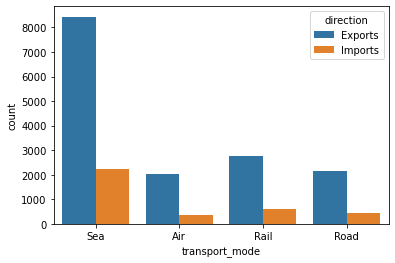

In [14]:
ax = sns.countplot(x="transport_mode", data=sldf, hue="direction")

Del grafico superior es fácil visualizar que, tanto para exportaciones como para importaciones, los medios de transporte más utilizados son por mar, por riel y por carretera.
Ahora sigue hacer un análisis tomando en cuenta los valores de las ganancias, para facilitar la visualización realizamos un análisis anual.

In [15]:
#Obtenemos un dataframe agrupando por año y medio de transporte
transportes_anuales = sldf.groupby(by=["year", "transport_mode"])
# Creamos una lista en la que tengamos como índices los años y los medios de transporte
#además sumamos los valores obtenidos para cada uno de ellos
valor_anual_transporte = transportes_anuales["total_value"].agg(pd.Series.sum)
valor_anual_transporte

year  transport_mode
2015  Air                7023000000
      Rail               4437488000
      Road               8231077000
      Sea               11306827000
2016  Air                3459111000
      Rail               5479198000
      Road               4710088000
      Sea               18500041000
2017  Air                9065068000
      Rail               8483234000
      Road               2042000000
      Sea               14838463000
2018  Air                2457374000
      Rail              10632394000
      Road               6502062000
      Sea               17542148000
2019  Air                9037995000
      Rail               4684366000
      Road               8732171000
      Sea               18486953000
2020  Air                7219599000
      Rail               9911363000
      Road               3053088000
      Sea               19856190000
Name: total_value, dtype: int64

In [16]:
# Creamos una nueva variable dataframe
info_transp_anual = pd.DataFrame()
# Guardamos la serie "valor_anual_transporte" en el dataframe
info_transp_anual["valor_total"] = valor_anual_transporte
# Añadimos una columna de frecuencia que cuenta la cantidad de incidencias
info_transp_anual["frecuencia"] = transportes_anuales["total_value"].describe()["count"]
info_transp_anual

valor_total  frecuencia
year transport_mode                         
2015 Air              7023000000       417.0
     Rail             4437488000       542.0
     Road             8231077000       609.0
     Sea             11306827000      1619.0
2016 Air              3459111000       318.0
     Rail             5479198000       507.0
     Road             4710088000       344.0
     Sea             18500041000      2004.0
2017 Air              9065068000       536.0
     Rail             8483234000       660.0
     Road             2042000000       111.0
     Sea             14838463000      1874.0
2018 Air              2457374000       399.0
     Rail            10632394000       749.0
     Road             6502062000       556.0
     Sea             17542148000      1476.0
2019 Air              9037995000       358.0
     Rail             4684366000       341.0
     Road             8732171000       668.0
     Sea             18486953000      1813.0
2020 Air              7219599000       361.0
     Rail             9911363000       582.0
     Road             3053088000       310.0
     Sea             19856190000      1902.0

Ahora mostramos un gráfico de los años contra la frecuencia con la que se se utilizaron los distintos transportes contra el paso de los años.

<AxesSubplot:xlabel='year', ylabel='frecuencia'>

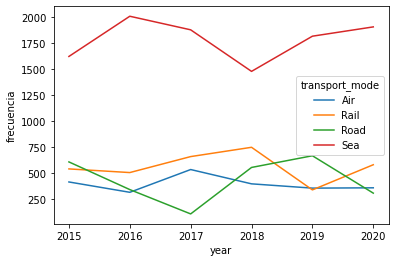

In [17]:
sns.lineplot(x="year", y="frecuencia", hue="transport_mode", data=info_transp_anual)

A continuación se grafica el valor de las importaciones y exportaciones realizadas contra el paso de los años.

<AxesSubplot:xlabel='year', ylabel='valor_total'>

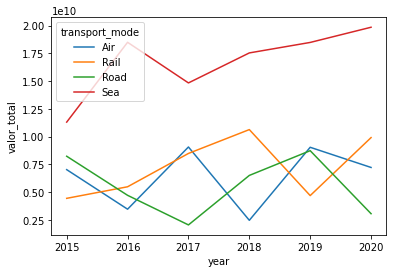

In [18]:
sns.lineplot(x="year", y="valor_total", hue="transport_mode", data=info_transp_anual)

Opción 3: Valor total de importaciones y exportaciones

Synergy Logistics desea enfocarse en los países que generan el 80% de sus ganancias en importaciones y exportaciones.


In [19]:
# Comenzamos creando un dataframe para las importaciones y otro para las exportaciones
importaciones = sldf[ sldf["direction"] == "Imports"]
exportaciones = sldf[ sldf["direction"] == "Exports"]

In [20]:
impo_origen = importaciones.groupby("origin").sum()
impo_destino = importaciones.groupby("destination").sum()
expo_origen = exportaciones.groupby("origin").sum()
expo_destino = exportaciones.groupby("destination").sum()

In [21]:
def top_porcentaje(df, m, origin_or_destination):
    suma_total = df.sum()
    suma_total = suma_total["total_value"]
    df['porcentaje'] = (df["total_value"] * 100 /suma_total)
    df = df.sort_values("porcentaje", ascending=False)
    col_suma_acumulada = df.cumsum()["porcentaje"]
    df["porcentaje_acumulado"] = col_suma_acumulada
    top_80 = df[ df["porcentaje_acumulado"] <= 80]
    print(f"Los aportan países que generan mayor valor en {m} son:")
    print(top_80)

    sns.lineplot(x= origin_or_destination, y='porcentaje', data=top_80)

Los aportan países que generan mayor valor en importaciones considerando el país de origen son:
             register_id     year  total_value  porcentaje  \
origin                                                       
China           10471059  1240848  12233000000   22.030327   
Japan            7499140   897766   8094000000   14.576430   
USA              6464417   758592   5291000000    9.528526   
Mexico           6313795   738306   4621000000    8.321928   
Germany          6470757   744786   4250000000    7.653796   
Singapore        4844672   550813   4017000000    7.234188   
South Korea      2621697   324757   3889000000    7.003674   

             porcentaje_acumulado  
origin                             
China                   22.030327  
Japan                   36.606757  
USA                     46.135283  
Mexico                  54.457211  
Germany                 62.111007  
Singapore               69.345195  
South Korea             76.348869  


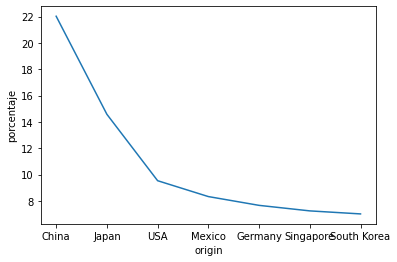

In [22]:
top_porcentaje(impo_origen, "importaciones considerando el país de origen", "origin")

Los aportan países que generan mayor valor en importaciones considerando el país destino son:
                      register_id     year  total_value  porcentaje  \
destination                                                           
Thailand                 14419188  1678197  13745000000   24.753278   
Mexico                    7172388   871457   8894000000   16.017145   
United Arab Emirates      4171713   522950   7848000000   14.133410   
Japan                     7293821   835156   5828000000   10.495606   
Germany                   5934946   715645   5109000000    9.200764   

                      porcentaje_acumulado  
destination                                 
Thailand                         24.753278  
Mexico                           40.770422  
United Arab Emirates             54.903832  
Japan                            65.399438  
Germany                          74.600202  


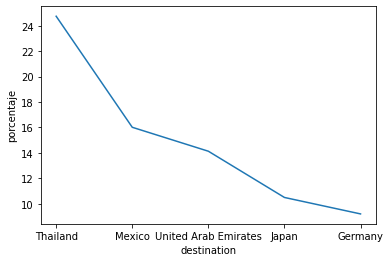

In [23]:
top_porcentaje(impo_destino, "importaciones considerando el país destino", "destination")

Los aportan países que generan mayor valor en exportaciones considerando el país de origen son:
             register_id     year  total_value  porcentaje  \
origin                                                       
China            9395944  3343248  32977046000   20.589640   
France           8439498  1854137  18614332000   11.622096   
USA              7596698  2953071  18355306000   11.460370   
South Korea      6218469  2287853  14621146000    9.128899   
Russia           1826527  1545745  13223000000    8.255949   
Japan            8342837  2535907  11948976000    7.460496   
Germany         13054382  2612813  11343233000    7.082292   

             porcentaje_acumulado  
origin                             
China                   20.589640  
France                  32.211736  
USA                     43.672105  
South Korea             52.801004  
Russia                  61.056953  
Japan                   68.517449  
Germany                 75.599741  


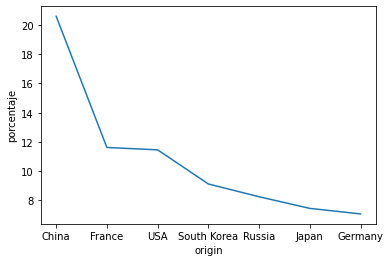

In [24]:
top_porcentaje(expo_origen, "exportaciones considerando el país de origen", "origin")

Los aportan países que generan mayor valor en exportaciones considerando el país destino son:
                register_id     year  total_value  porcentaje  \
destination                                                     
Mexico              8763281  2833936  28315015000   17.678841   
USA                10635772  2712607  13159409000    8.216245   
Belgium             9138742  2518156  13099380000    8.178765   
Germany             5683351  1662185  11303451000    7.057454   
China               5667365  2033229  11259992000    7.030320   
Japan               4167859  1327472   8777152000    5.480127   
United Kingdom      4023051  1071229   8150673000    5.088977   
Brazil              6986219  1822080   7508016000    4.687726   
South Korea         2678925   837067   7321668000    4.571377   
Vietnam             2252300  1002958   6877007000    4.293747   
Italy               3638931   851424   6109329000    3.814438   
Spain               5346262  1275052   5934191000    3.705088

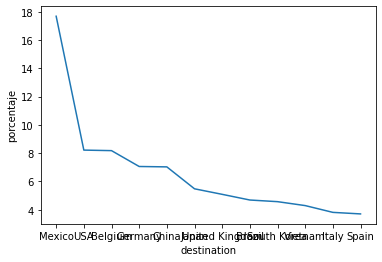

In [25]:
top_porcentaje(expo_destino, "exportaciones considerando el país destino", "destination")